In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def recip(x, y, L, ita, K):
    dk = 4 * np.pi / (np.sqrt(3) * L)
    uxx = 0
    uyy = 0
    uxy = 0
    for i in range(K):
        for j in range(K):
            if i == 0 and j == 0:
                continue
            kx = dk * (j + 0.5 * i)
            ky = dk * np.sqrt(3) / 2 * i
            k2 = kx**2 + ky**2
            factor = np.exp(-k2 / (4 * ita**2)) / k2
            kr = kx * x + ky * y
            uxx += factor * kx**2 * np.cos(kr)
            uyy += factor * ky**2 * np.cos(kr)
            uxy += factor * kx *ky * np.cos(kr)
    return uxx, uyy, uxy

In [3]:
def real(x, y, L, ita, l):
    uxx= 0
    uyy = 0
    uxy = 0
    for i in range(-l, l + 1):
        for j in range(-l, l + 1):
            x = x + L * j - 0.5 * L * i
            y = y + np.sqrt(3) / 2 * L * i
            r2 = x**2 + y**2
            if r2 == 0:
                continue
            uxx += (-x**2 + y**2 -2 * x**2 * ita**2 * r2)/ r2**2 * np.exp(-ita**2 * r2)
            uyy += (x**2 - y**2 -2 * y**2 * ita**2 * r2)/ r2**2 * np.exp(-ita**2 * r2)
            uxy -= 2 * x * y * (1 + r2 * ita**2)/ r2**2 * np.exp(-ita**2 * r2)
    return uxx, uyy, uxy

In [106]:
r = []
k = []
L = 100
dx = 45
dy = 1
ita = 6 / L
for K in range(50):
    r.append(real(dx, dy, L, ita, K)[2])
    k.append(recip(dx, dy, L, ita, K)[2])
    
    

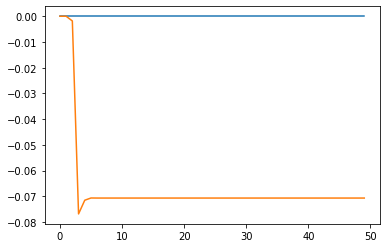

In [107]:
plt.plot(r)
plt.plot(k)

In [4]:
L = 100
ita = 6 / L
exx, eyy, exy = np.zeros((L, L)), np.zeros((L, L)), np.zeros((L, L))
x0 = L//2 * 0.5
y0 = L//2 * np.sqrt(3) / 2
for i in range(L):
    for j in range(L):
        
        x = j-0.5*i - x0
        y = i * np.sqrt(3)/2 - y0
        r2 = x**2 + y**2
        if r2 == 0:
            continue
        rec0, rec1, rec2 = recip(x, y, L, ita, 10)
        re0, re1, re2 = real(x, y, L, ita, 0)
        exx[i, j] = re0 + 2 * np.pi / (np.sqrt(3)/2*L**2) * rec0
        eyy[i, j] = re1 + 2 * np.pi / (np.sqrt(3)/2*L**2) * rec1
        exy[i, j] = re2 + 2 * np.pi / (np.sqrt(3)/2*L**2) * rec2

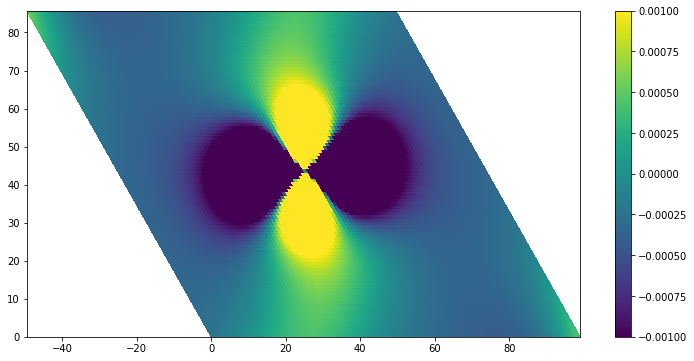

In [6]:
#plot in the shape of the rhombus
Y=[[np.sqrt(3) * i / 2]* L for i in range(L)]
X=[np.arange(L) -0.5 * i for i in range(L)]
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im = ax.pcolormesh(X, Y, exx, vmin = -0.001, vmax = 0.001)
fig.colorbar(im)

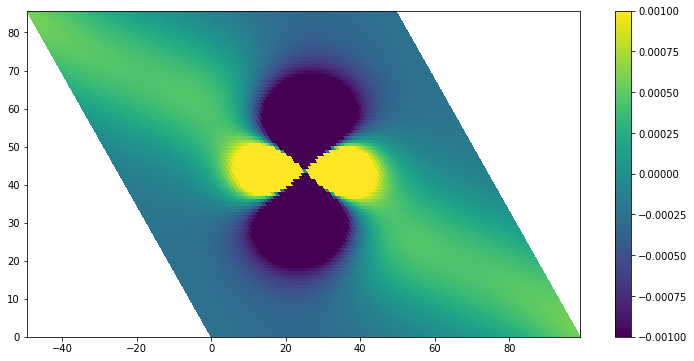

In [7]:
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im = ax.pcolormesh(X, Y, eyy, vmin = -0.001, vmax = 0.001)
fig.colorbar(im)

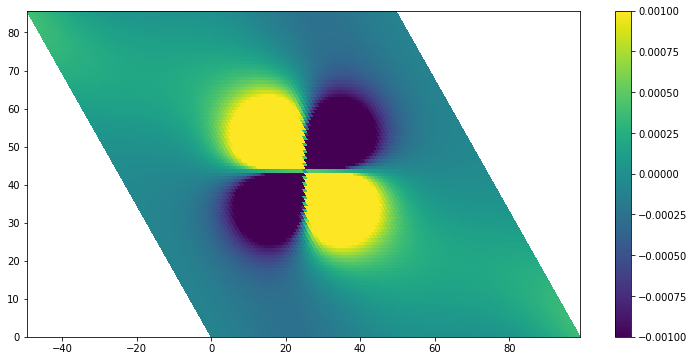

In [8]:
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im = ax.pcolormesh(X, Y, exy, vmin = -0.001, vmax = 0.001)
fig.colorbar(im)

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def image_sum(i0, j0, L, l):
    exx, eyy, exy = np.zeros((L,L)), np.zeros((L,L)), np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            for m in range(-l, l+1):
                for n in range(-l, l+1):
                    di = i - (i0 + L * m)
                    dj = j - (j0 + L * n)

                    x = dj - 0.5 * di
                    x = x / 1
                    y = np.sqrt(3) * 0.5 * di
                    y = y / 1
                    r = np.sqrt((x)**2 + (y)**2)
                    if r < 0.1:
                        continue
                    exx[i, j] += 1 / (r**2) - 2 * x**2 / r**4
                    eyy[i, j] += 1 / (r**2) - 2 * y**2 / r**4
                    exy[i, j] += -2 * x * y / (r**4)
    return exx, eyy, exy

In [101]:
L =100
exx0, eyy0, exy0 = image_sum(L//2, L//2, L, 0)

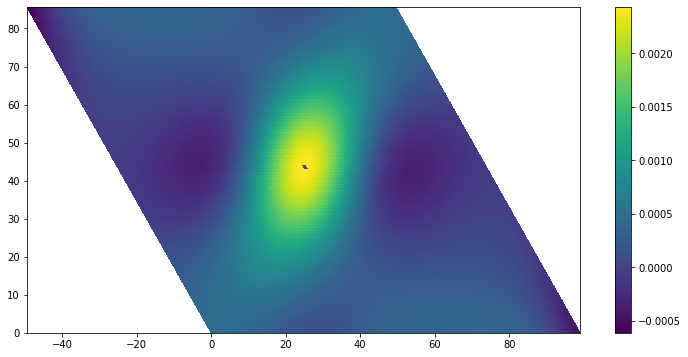

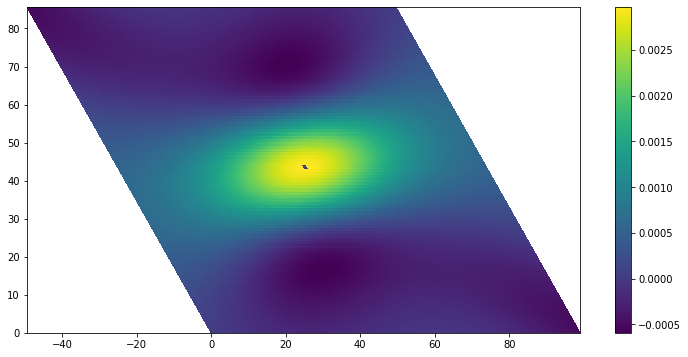

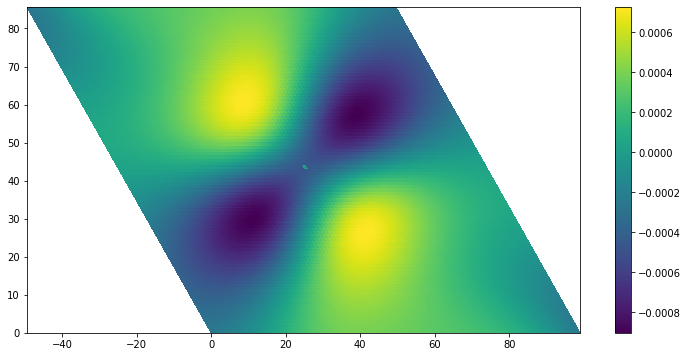

In [111]:

fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, exx0 - exx)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, eyy0 - eyy)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, exy0 - exy)
fig.colorbar(im)

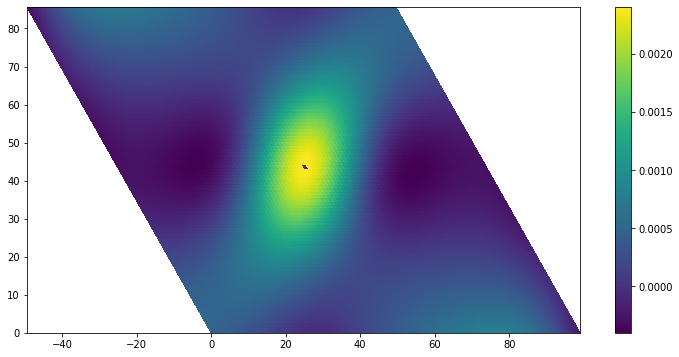

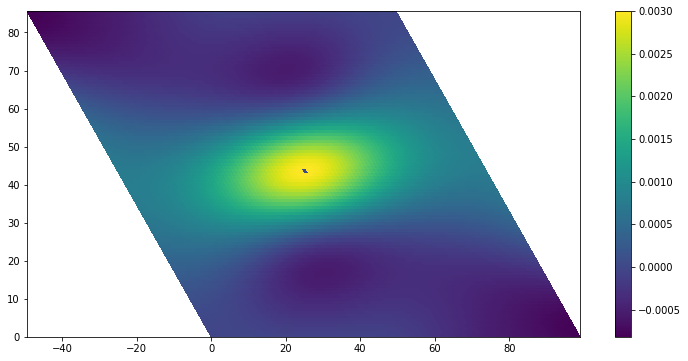

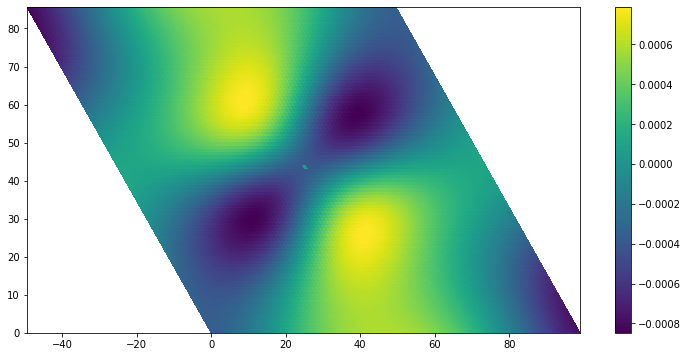

In [103]:
exx1, eyy1, exy1 = image_sum(L//2, L//2, L, 1)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, exx1 - exx)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, eyy1 - eyy)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, exy1 - exy)
fig.colorbar(im)

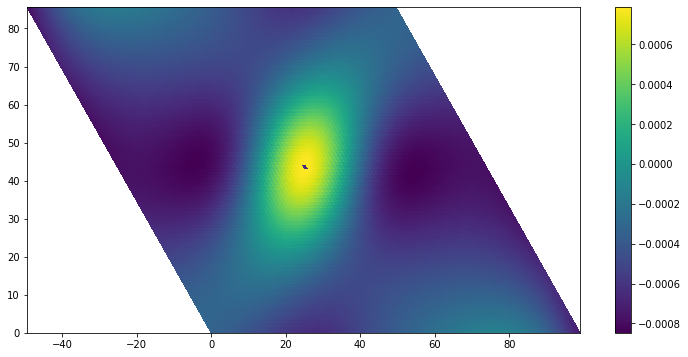

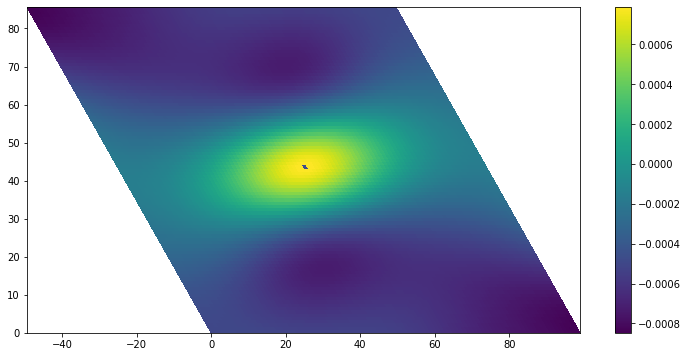

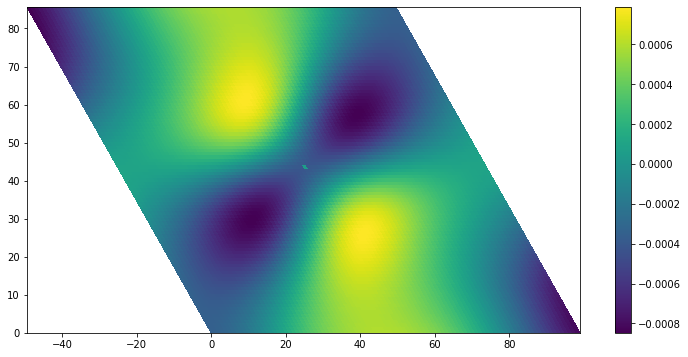

In [108]:
exx10, eyy10, exy10 = image_sum(L//2, L//2, L, 10)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, exx10 - exx)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, eyy10 - eyy)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, exy10 - exy)
fig.colorbar(im)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


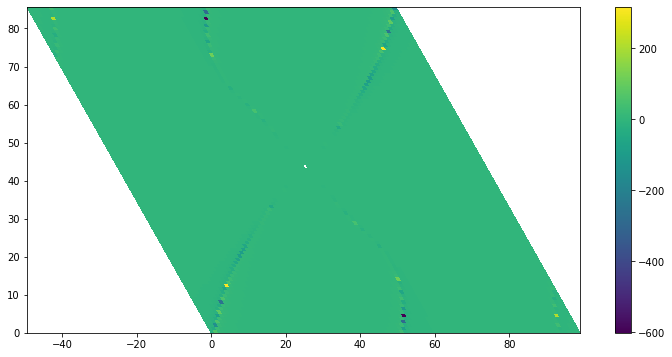

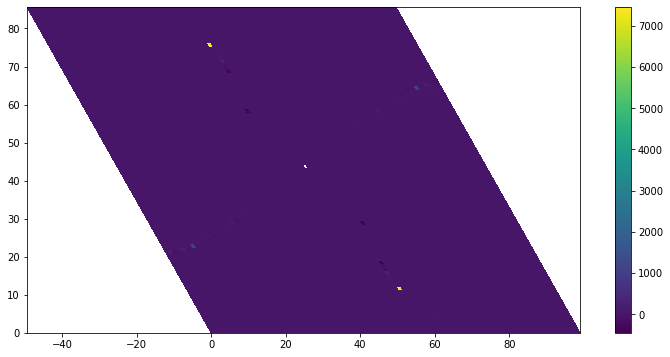

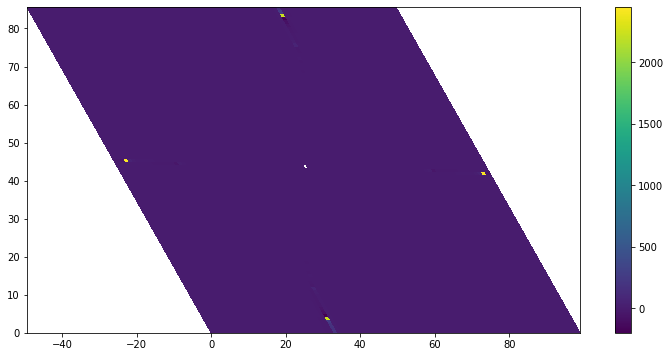

In [110]:
#plot in the shape of the rhombus
Y=[[np.sqrt(3) * i / 2]* L for i in range(L)]
X=[np.arange(L) -0.5 * i for i in range(L)]
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exx0 - exx)/(exx0 + exx))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (eyy0 - eyy) / (eyy0 + eyy))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exy0 - exy)/(exy0 + exy))
fig.colorbar(im)

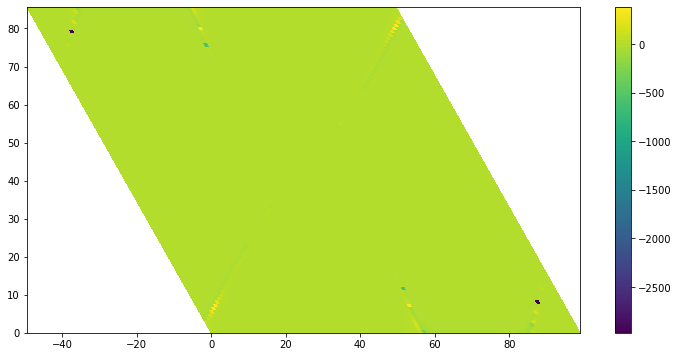

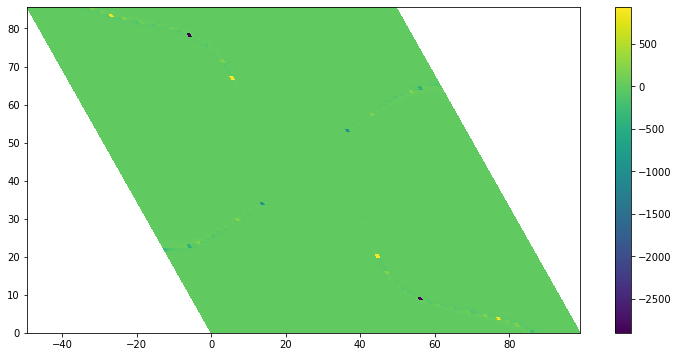

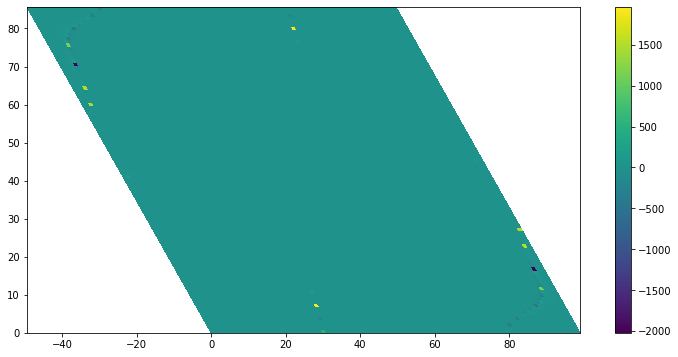

In [112]:
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exx1 - exx)/(exx1 + exx))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (eyy1 - eyy) / (eyy1 + eyy))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exy1 - exy)/(exy1 + exy))
fig.colorbar(im)

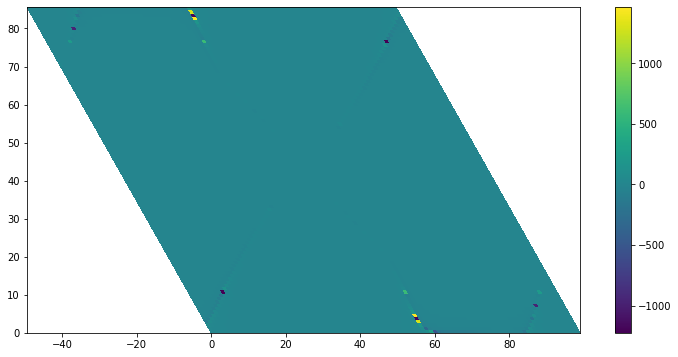

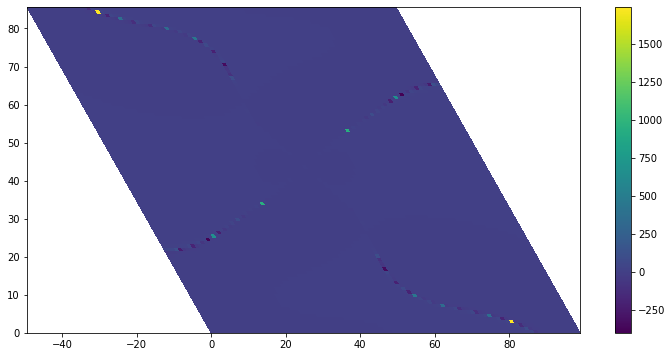

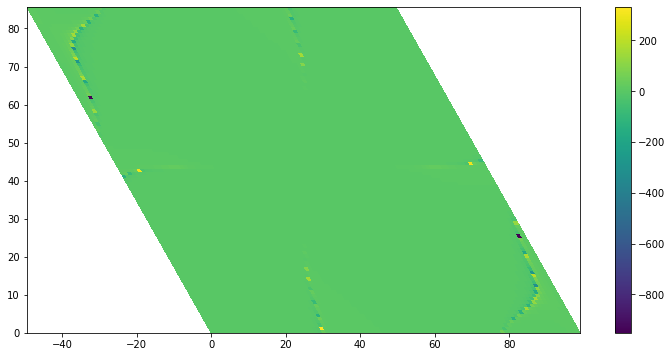

In [113]:
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exx10 - exx)/(exx10 + exx))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (eyy10 - eyy) / (eyy10 + eyy))
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
im=ax.pcolormesh(X, Y, (exy10 - exy)/(exy10 + exy))
fig.colorbar(im)

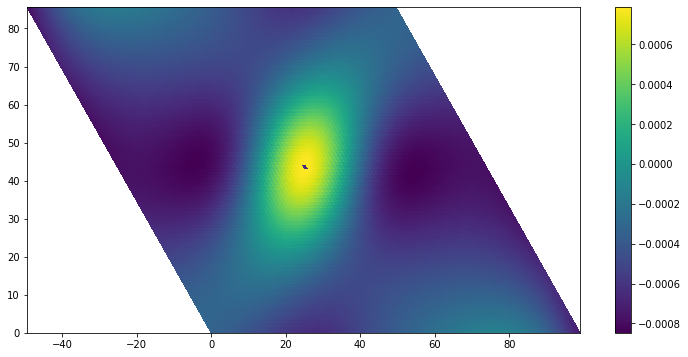

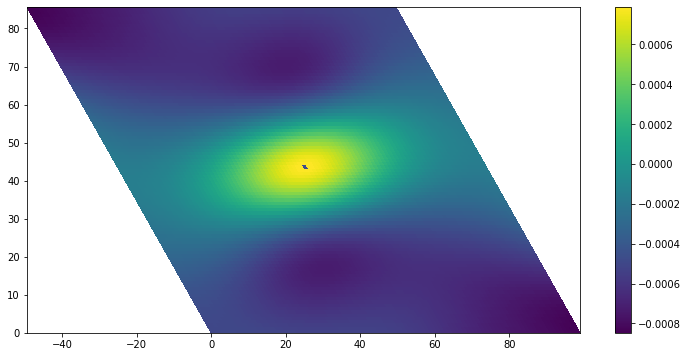

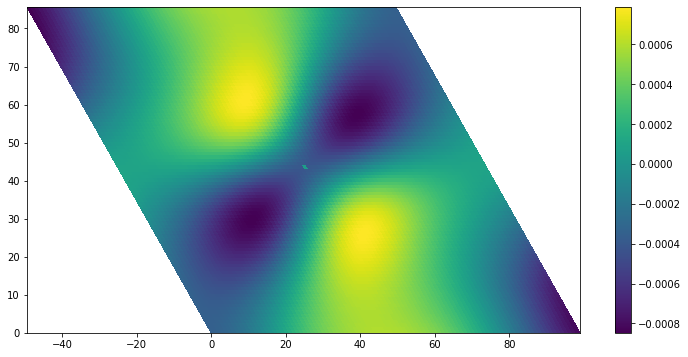

In [109]:
exx20, eyy20, exy20 = image_sum(L//2, L//2, L, 10)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, exx20 - exx)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, eyy20 - eyy)
fig.colorbar(im)
fig,ax=plt.subplots(figsize=(6*np.sqrt(3) + 2, 6))
ax.pcolormesh(X, Y, exy20 - exy)
fig.colorbar(im)

In [104]:
dj = np.zeros((L, L, 6))
nn = np.array([[1, 0], [-1, 0], [-0.5, 0.5*np.sqrt(3)], 
               [0.5, 0.5*np.sqrt(3)], [0.5, -0.5*np.sqrt(3)], [-0.5, -0.5*np.sqrt(3)]])
for i in range(L):
    for j in range(L):
        for k in range(6):
            #dj[i,j,k] = nn[k]@([[exx[i, j], exy[i, j]], [exy[i, j], eyy[i, j]]]@nn[k])
            dj[i, j, k] = exx[i, j] * nn[k][0]**2 + eyy[i, j] * nn[k][1]**2 + 2 * exy[i, j] * nn[k][1] * nn[k][0]
                                

-0.00038486215689448094 -0.00033449874485794596 -0.00024588266817827535


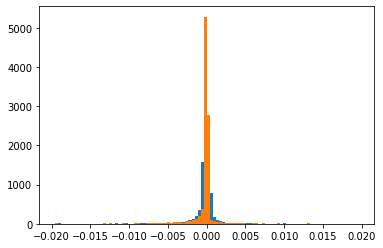

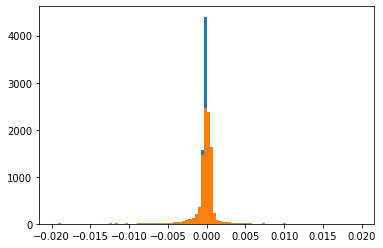

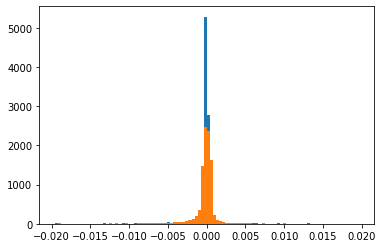

In [105]:
std = dj.std() / 1
fig, ax = plt.subplots()
ax.hist(dj[:,:,0].flatten(), bins = 100, range=(-std,std));
ax.hist(dj[:,:,2].flatten(), bins = 100, range=(-std, std));
fig, ax = plt.subplots()
ax.hist(dj[:,:,0].flatten(), bins = 100, range=(-std, std));
ax.hist(dj[:,:,3].flatten(), bins = 100, range=(-std, std));
fig, ax = plt.subplots()
ax.hist(dj[:,:,2].flatten(), bins = 100, range=(-std, std));
ax.hist(dj[:,:,3].flatten(), bins = 100, range=(-std, std));
print(np.mean(dj[:,:,0]), np.mean(dj[:,:,2]), np.mean(dj[:,:,3]))

In [89]:
dj = np.zeros((L, L, 6))
nn = np.array([[1, 0], [-1, 0], [-0.5, 0.5*np.sqrt(3)], 
               [0.5, 0.5*np.sqrt(3)], [0.5, -0.5*np.sqrt(3)], [-0.5, -0.5*np.sqrt(3)]])
for i in range(L):
    for j in range(L):
        for k in range(6):
            #dj[i,j,k] = nn[k]@([[exx[i, j], exy[i, j]], [exy[i, j], eyy[i, j]]]@nn[k])
            dj[i, j, k] = exx10[i, j] * nn[k][0]**2 + eyy10[i, j] * nn[k][1]**2 + 2 * exy10[i, j] * nn[k][1] * nn[k][0]
                                

-3.575933362209103e-05 -3.5759333622091326e-05 7.15186672441822e-05


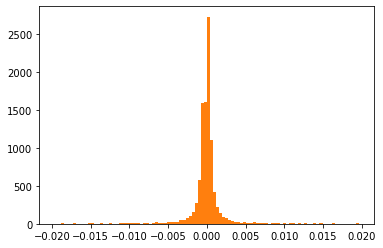

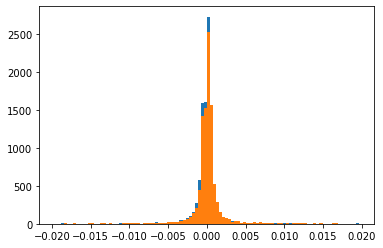

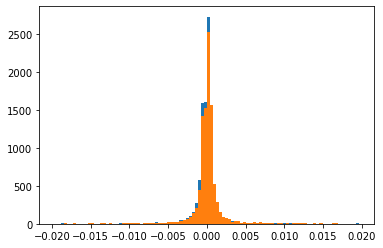

In [90]:
std = dj.std() / 1
fig, ax = plt.subplots()
ax.hist(dj[:,:,0].flatten(), bins = 100, range=(-std,std));
ax.hist(dj[:,:,2].flatten(), bins = 100, range=(-std, std));
fig, ax = plt.subplots()
ax.hist(dj[:,:,0].flatten(), bins = 100, range=(-std, std));
ax.hist(dj[:,:,3].flatten(), bins = 100, range=(-std, std));
fig, ax = plt.subplots()
ax.hist(dj[:,:,2].flatten(), bins = 100, range=(-std, std));
ax.hist(dj[:,:,3].flatten(), bins = 100, range=(-std, std));
print(np.mean(dj[:,:,0]), np.mean(dj[:,:,2]), np.mean(dj[:,:,3]))